<a href="https://colab.research.google.com/github/aprajeeta10/python-projects/blob/main/Calculating_Black_Scholes_Greeks_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
!pip install py_vollib
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 8.3 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62829 sha256=8c2ce40b8683d31406180d82077a36eab6fc7cce375db9b77ce3655d2e959f6c
  Stored in directory: /root/.cache/pip/wheels/84/0c/fc/b68506eda40cccaeb0013be550ba904d253ec90eae2b156052
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24450 sha256=e7cc082af7cbb3252669a9911f8a4c5c0974deaf0bfa0ac5a19db0e840325bab
  Stored in directory: /root/.cache/pip/wheels/32/d9/4f/360d4b0b9ec7c65583ec7c8e72fd2158c97ad04fbcb932891c
Successfully built py_vollib py_lets_be_rational


/usr/local/lib/python3.10/dist-packages/py_lets_be_rational/numba_helper.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  return jit(*jit_args, **jit_kwargs)(fun)


**Implementation of Black-Scholes formula in Python**

In [2]:
# Implementation of Black-Scholes formula in Python
import numpy as np
from scipy.stats import norm
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

# Define variables
r = 0.01
S = 30
K = 40
T = 240/365
sigma = 0.30

def blackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price, bs(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [3]:
print("Option Price: ", blackScholes(r, S, K, T, sigma, "c"))

Option Price:  (0.5132843798399405, 0.5132843798399411)


**Calculate delta of an option**

In [4]:
def delta_calc(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc, delta(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

**Calculate gamma of an option**

In [5]:
def gamma_calc(r, S, K, T, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        gamma_calc = norm.pdf(d1, 0, 1)/(S*sigma*np.sqrt(T))
        return gamma_calc, gamma(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

**Calculate vega of an option**

In [6]:
def vega_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        vega_calc = S*norm.pdf(d1, 0, 1)*np.sqrt(T)
        return vega_calc*0.01, vega(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

**Calculate theta of an option**

In [7]:
def theta_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return theta_calc/365, theta(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

**Calculate rho of an option**

In [8]:
def rho_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            rho_calc = -K*T*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return rho_calc*0.01, rho(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [9]:
option_type='p'

print("Option Price: ", [round(x,3) for x in blackScholes(r, S, K, T, sigma, option_type)])
print("Option Delta: ", [round(x,3) for x in delta_calc(r, S, K, T, sigma, option_type)])
print("Option Gamma: ", [round(x,3) for x in gamma_calc(r, S, K, T, sigma, option_type)])
print("Option Vega : ", [round(x,3) for x in vega_calc(r, S, K, T, sigma, option_type)])
print("Option Theta: ", [round(x,3) for x in theta_calc(r, S, K, T, sigma, option_type)])
print("Option Rho  : ", [round(x,3) for x in rho_calc(r, S, K, T, sigma, option_type)])

Option Price:  [10.251, 10.251]
Option Delta:  [-0.849, -0.849]
Option Gamma:  [0.032, 0.032]
Option Vega :  [0.057, 0.057]
Option Theta:  [-0.003, -0.003]
Option Rho  :  [-0.235, -0.235]


### Summary of the Black-Scholes Greeks Model

**Purpose of the Model**:
- The model calculates the "Greeks" for options, which are measures of the sensitivity of the option's price to various factors. The Greeks are important for understanding and managing the risk associated with options trading.

**Importance of the Model**:
- The Black-Scholes Greeks are essential for traders and risk managers to hedge portfolios and make informed decisions about buying and selling options. They provide insights into how the price of an option changes with respect to different market variables.

### Underlying Assumptions

1. **Efficient Markets**: The market is efficient, meaning asset prices fully reflect all available information.
2. **Lognormal Distribution**: Asset prices follow a lognormal distribution.
3. **Constant Volatility**: The volatility of the asset’s returns is constant over the option's life.
4. **Constant Risk-Free Rate**: The risk-free interest rate is constant and known over the option's life.
5. **No Dividends**: The underlying asset does not pay dividends during the option’s life.
6. **No Arbitrage**: There are no arbitrage opportunities.

### Inner Workings of the Model

1. **Key Parameters**:
   - \(S\): Current price of the underlying asset.
   - \(K\): Strike price of the option.
   - \(T\): Time to expiration (in years).
   - \(r\): Risk-free interest rate.
   - \(\sigma\): Volatility of the asset’s returns.
   - `type`: Option type ('c' for call, 'p' for put).

2. **Calculations**:
   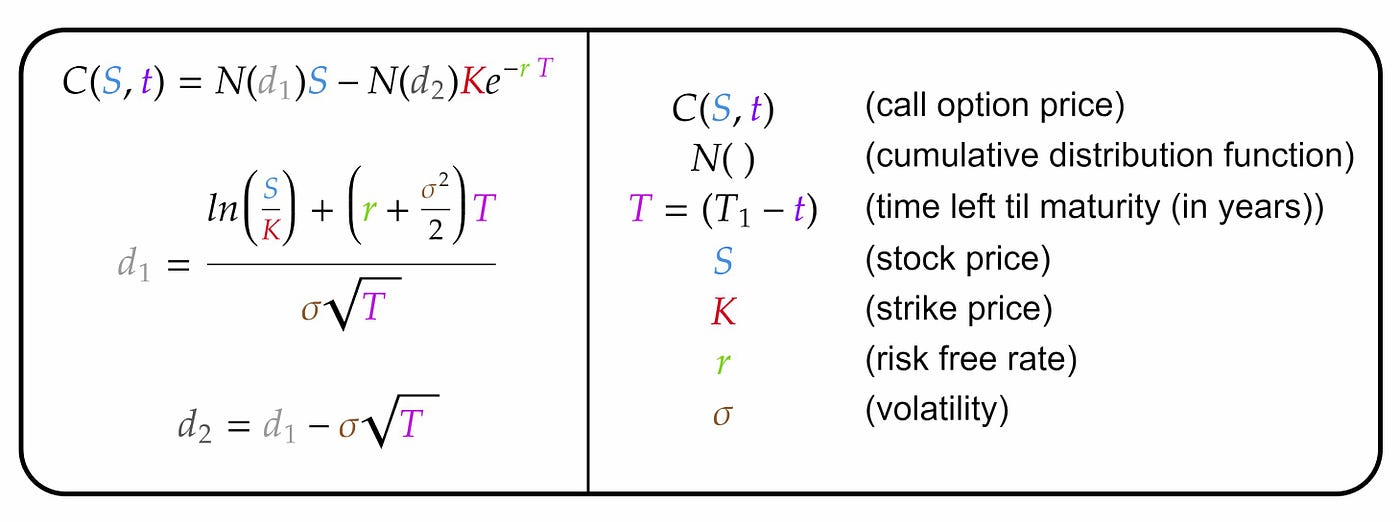

### The Greeks

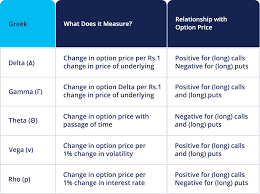

### Applications of the Model

1. **Risk Management**: Used by traders to hedge portfolios and manage risk.
2. **Option Pricing**: Helps in determining the fair price of options.
3. **Trading Strategies**: Used in developing and executing various trading strategies.
4. **Financial Engineering**: Essential for the design and valuation of complex financial instruments.